In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing

# Data: Superheroes

The following dataset displays superhero characteristics, the character name, and comic publisher. This information was taken from https://www.kaggle.com/claudiodavi/superhero-set/data. Manipulation of the dataset is for academic purposes.

In [2]:
df = pd.read_csv('C:\\Users\\cocob\\Downloads\\heroes_information.csv')

## Basic Info about Dataset

In [3]:
df.head()

,name,Gender,Eye color,Race,Race.1,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,ABomb,Male,yellow,Human,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Alien,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Alien,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Alien,Cosmic Entity,Black,99.0,Marvel Comics,NaN,bad,99.0


In [4]:
df.shape

(734, 11)

In [5]:
df.dtypes

name           object
Gender         object
Eye color      object
Race           object
Race.1         object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [6]:
df.describe()

,Height,Weight
count,734.000000,732.000000
mean,160.790872,107.961749
std,63.845126,85.843309
min,15.200000,2.000000
25%,99.000000,74.000000
50%,175.000000,99.000000
75%,185.000000,99.000000
max,975.000000,900.000000


In [7]:
pd.crosstab(df['Alignment'], df['Gender'],margins=True)

Gender,Female,Male,All
Alignment,,,
bad,35,165,200
good,161,316,477
neutral,4,24,28
All,200,505,705


## Data Transformation

In [8]:
df.dropna()

,name,Gender,Eye color,Race,Race.1,Hair color,Height,Publisher,Skin color,Alignment,Weight
1,Abe Sapien,Male,blue,Alien,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Alien,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
34,Apocalypse,Male,red,Mutant,Mutant,Black,213.0,Marvel Comics,grey,bad,135.0
39,Archangel,Male,blue,Mutant,Mutant,Blond,183.0,Marvel Comics,blue,good,68.0
41,Ardina,Female,white,Alien,Alien,Orange,193.0,Marvel Comics,gold,good,98.0
56,Azazel,Male,yellow,Woodland,Neyaphem,Black,183.0,Marvel Comics,red,bad,67.0
74,Beast,Male,blue,Mutant,Mutant,Blue,180.0,Marvel Comics,blue,good,181.0
75,Beast Boy,Male,green,Human,Human,Green,173.0,DC Comics,green,good,68.0
92,Bizarro,Male,black,Machine/Droid,Bizarro,Black,191.0,DC Comics,white,neutral,155.0
108,Blackout,Male,red,Demon,Demon,White,191.0,Marvel Comics,white,bad,104.0


In [9]:
df['Height2'] = np.where(df['Height'] <= 175, 'Short', 'Tall')

In [10]:
df['Weight2'] = np.where(df['Weight'] <= 99, 'Small', 'Big') 

In [11]:
df['Human'] = np.where((df['Race'].isin(['Human'])), 1, 0)

In [12]:
df['Male'] = np.where((df['Gender'].isin(['Male'])), 1, 0)

In [13]:
df['Female'] = np.where((df['Gender'].isin(['Female'])), 1, 0)

In [14]:
df['Good'] = np.where((df['Alignment'].isin(['good'])), 1, 0)

In [15]:
df['Bad'] = np.where((df['Alignment'].isin(['bad'])), 1, 0)

In [16]:
df['Hair'] = np.where((df['Hair color'].isin(['No Hair'])), 'No Hair', 'Hair')

In [17]:
df['Hair2'] = np.where((df['Hair color'].isin(['No Hair'])), 0, 1)

In [18]:
df.head()

,name,Gender,Eye color,Race,Race.1,Hair color,Height,Publisher,Skin color,Alignment,Weight,Height2,Weight2,Human,Male,Female,Good,Bad,Hair,Hair2
0,ABomb,Male,yellow,Human,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0,Tall,Big,1,1,0,1,0,No Hair,0
1,Abe Sapien,Male,blue,Alien,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,Tall,Small,0,1,0,1,0,No Hair,0
2,Abin Sur,Male,blue,Alien,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,Tall,Small,0,1,0,1,0,No Hair,0
3,Abomination,Male,green,Human,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0,Tall,Big,1,1,0,0,1,No Hair,0
4,Abraxas,Male,blue,Alien,Cosmic Entity,Black,99.0,Marvel Comics,NaN,bad,99.0,Short,Small,0,1,0,0,1,Hair,1


## Exploratory Analysis

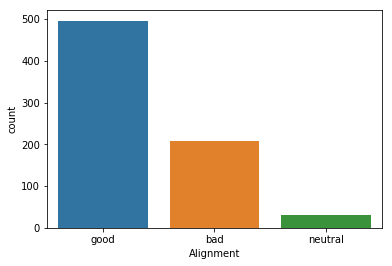

In [19]:
sns.countplot(x='Alignment', data=df);

The graph above demonstrates how many superheros are bad, good, or neutral. For the purpose of this project, main focus will be directed toward good and bad alignment. The analysis below will determine which gender, skin color, hair, and race generate what alignment.

### Height and Weight determination for Alignment

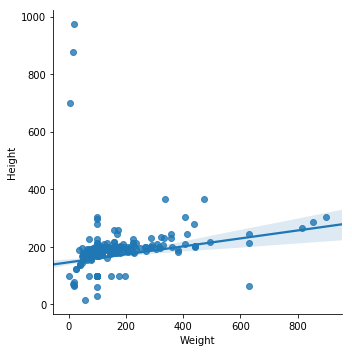

In [20]:
df5 = sns.lmplot(y='Height', x='Weight', data=df, fit_reg=True)

The scatter plot above shows as height increase, so does weight. The following charts will determine alignment depending on height and weight classes.

Text(0.5,1,'Weight')

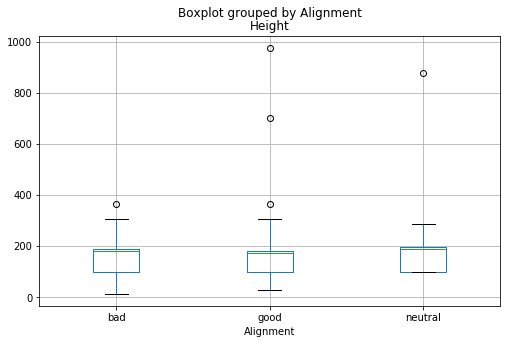

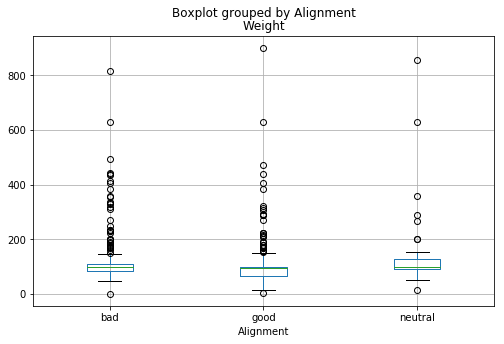

In [21]:
df.boxplot('Height', by= 'Alignment', figsize=(8,5))
plt.title('Height')
df.boxplot('Weight', by= 'Alignment', figsize=(8,5))
plt.title('Weight')

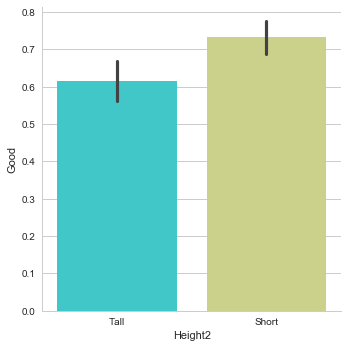

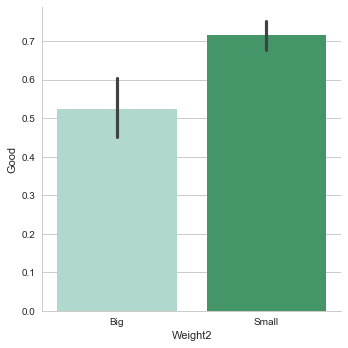

In [22]:
sns.set(style='whitegrid')
sns.factorplot(x='Height2', y='Good', data=df, size=5, kind='bar', palette='rainbow')
plt.show()

sns.set(style='whitegrid')
sns.factorplot(x='Weight2', y='Good', data=df, size=5, kind='bar', palette='BuGn')
plt.show()

Based on the graphics above, short and small superheros are more likely to be good than big and tall superheros. As height and weight increases, superhero alignment shifts towards bad.

### Gender and Alignment Correlation

In [23]:
df3 = pd.crosstab(df['Alignment'], df['Race'],margins=True)

In [24]:
stats.ttest_ind(df['Bad'], df['Male'])

Ttest_indResult(statistic=-17.01899303313765, pvalue=2.0534843544272114e-59)

In [25]:
stats.ttest_ind(df['Good'], df['Male'])

Ttest_indResult(statistic=-0.5040477086887254, pvalue=0.6143035910718535)

In [26]:
stats.ttest_ind(df['Bad'], df['Female'])

Ttest_indResult(statistic=0.40788221587086176, pvalue=0.6834197088324643)

In [27]:
stats.ttest_ind(df['Good'], df['Female'])

Ttest_indResult(statistic=16.900485622867876, pvalue=1.1084252540076607e-58)

Given the p-values, there is a correlation between gender and alignment. Males are more likely to be bad in comparison to females who have a stronger correlation for being good. The graph below visualizes this point.

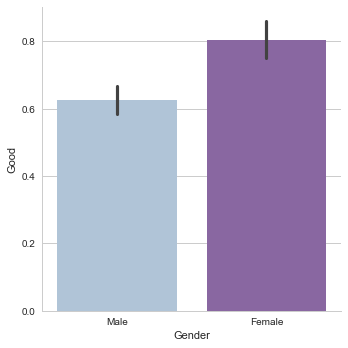

In [28]:
sns.set(style='whitegrid')
sns.factorplot(x='Gender', y='Good', data=df, size=5, kind='bar', palette='BuPu')
plt.show()

### Alignment by Physical Features

#### Hero Alignment Given Skin Color

In [29]:
pd.crosstab(df['Alignment'], df['Skin color'],margins=True)

Skin color,black,blue,bluewhite,gold,gray,green,grey,orange,orange / white,pink,purple,red,red / black,silver,white,yellow,All
Alignment,,,,,,,,,,,,,,,,,
bad,1,3,0,0,0,6,4,0,0,0,2,4,1,3,3,1,28
good,0,5,0,2,1,14,1,1,1,2,0,3,0,2,3,0,35
neutral,0,1,1,1,0,1,0,0,0,0,1,2,0,0,1,1,9
All,1,9,1,3,1,21,5,1,1,2,3,9,1,5,7,2,72


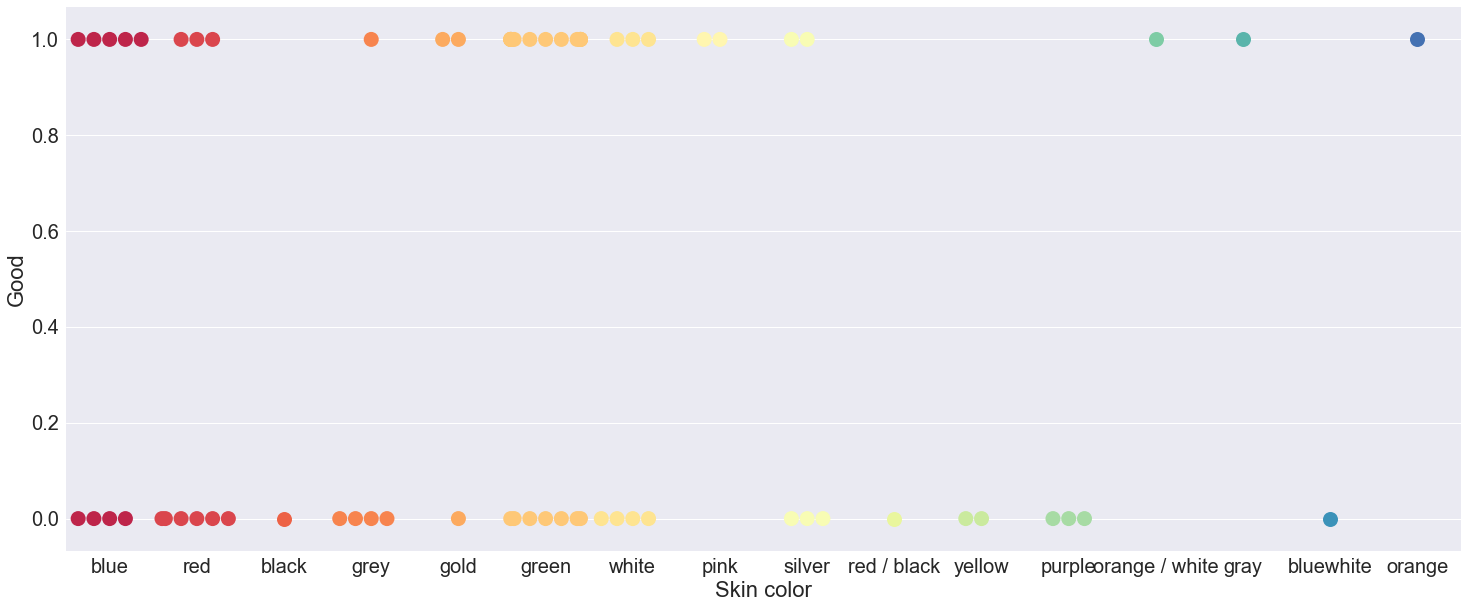

In [30]:
sns.set(font_scale=2)
plt.subplots(figsize=(25,10))
sns.swarmplot(x='Skin color', y='Good', data=df, size=15, palette='Spectral')
plt.show()

Shown above is the superhero alignment by skin color. Most notable colors were blue, red, grey, and green since majority of superheroes are these colors. Grey superheroes illustrate 4/5 chance in being bad. While the black superhero is likely to align as bad, the n value in only one.

Upon inspection, grey spectrum skin colors were more likely to display bad alignment in comparison to the remaining colors. This notion demonstrates that color vibrancy may be an indicator of character alignment. Green superheroes clearly promote this notion as they are mostly likely to be good.

#### Alignment based on Hair

In [31]:
df['Hair2'] = np.where((df['Hair color'].isin(['No Hair'])), 0, 1)
stats.ttest_ind(df['Bad'], df['Hair2'])

Ttest_indResult(statistic=-30.736655498666014, pvalue=1.518703872000688e-160)

In [32]:
stats.ttest_ind(df['Good'], df['Hair2'])

Ttest_indResult(statistic=-10.783684960480832, pvalue=3.8190308232290055e-26)

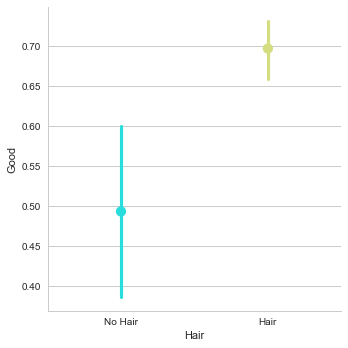

In [33]:
sns.set(style='whitegrid')
sns.factorplot(x='Hair', y='Good', data=df, kind='point', palette='rainbow', size=5)
plt.show()

Based on the info provided above, superhereos with hair are more likely to align good. Contrastly, superhereos without hair are more likely to align bad.

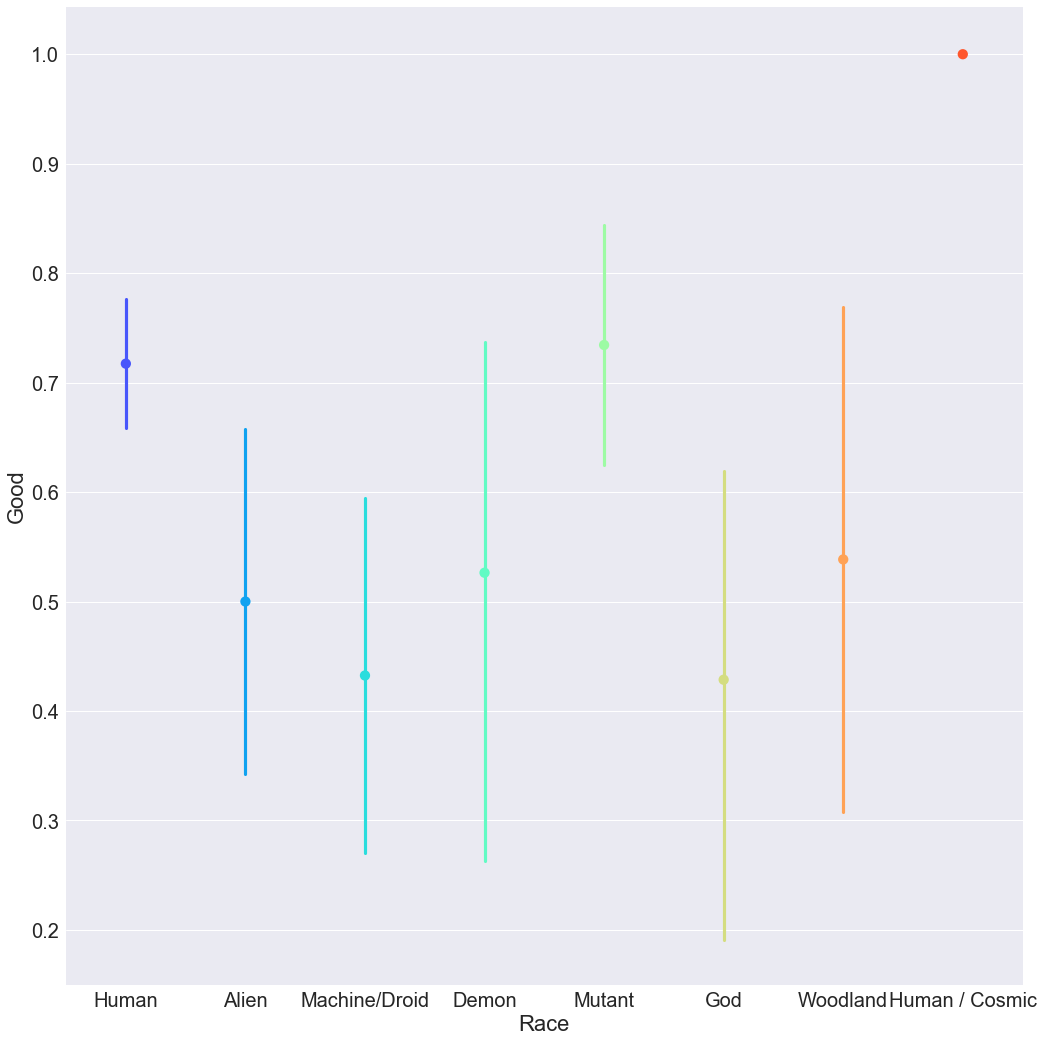

In [34]:
sns.set(font_scale=2)
sns.factorplot(x='Race', y='Good', data=df, kind='point', palette='rainbow', size=15)
plt.show()

Most Races vary staying within between bad and almost good. Woodland, Demon, and god consist of a wide range. Humans and Mutants trend closer to good. While Human/Cosmic is aligns good, there is only a n value of one.

# Feature Correlation

In [36]:
df.corr()

,Height,Weight,Human,Male,Female,Good,Bad,Hair2
Height,1.000000,0.186268,0.081407,0.095895,-0.070007,-0.055060,0.011650,-0.131342
Weight,0.186268,1.000000,-0.007792,0.154446,-0.166369,-0.190116,0.139842,-0.147138
Human,0.081407,-0.007792,1.000000,0.093966,-0.043046,0.061297,-0.070177,0.069423
Male,0.095895,0.154446,0.093966,1.000000,-0.908808,-0.158644,0.147571,-0.168923
Female,-0.070007,-0.166369,-0.043046,-0.908808,1.000000,0.168983,-0.145546,0.186253
Good,-0.055060,-0.190116,0.061297,-0.158644,0.168983,1.000000,-0.904758,0.131467
Bad,0.011650,0.139842,-0.070177,0.147571,-0.145546,-0.904758,1.000000,-0.138434
Hair2,-0.131342,-0.147138,0.069423,-0.168923,0.186253,0.131467,-0.138434,1.000000


Based on the feature correlations, height, weight, human, male, female, and hair2 are not heavliy correlated with good and bad alignments. The values are closer to zero than one. This means height, weight, being human or not, gender, and having hair or not are not ideal predictors for alignment.

For the purposes of this assignment, these features were created to learn/practice creating new features and manipulating data. While the charts above exhibit numeric values for these feature in correlation to alignment, the overall correlation demonstartes these features may not be the best ones.

For future studies, exploring different data sets may serve as better guides for learning feature creation and data manipulations.